**Curvature correction initialization**

In this notebook a 5-step procedure for curvature correction of an image is performed. The main idea of the curvature correction workflow is to work through a reference image and determine the procedure for correcting the curvature. Then the entire procedure (in form of different parameters) are stored in a config dictionary inside the CurvatureCorrection class, and is to be used to directly curvature correct future images with the same camera setup.


DarIA needs to be imported.

In [1]:
import daria as da

# Set matplotlib to plot interactive windows, requires the installation of ipympl (pip install ipympl, or conda install -c conda-forge ipympl)
%matplotlib ipympl

**Step 1: Initialization**

First the CurvatureCorrection object is initialized with the image_source (this can either be the path to an image or an image matrix), and the height and width of the image. 

Note: The curvature correction object can directly be initialized from a json file with the curvature correction parameters as well, more on that later in the notebook.

In [2]:
curv_correction = da.CurvatureCorrection(image_source = "../images/baseline_with_laser_grid.jpg", width = 2.8, height = 1.5)

**Step 2: Pre-bulge correction**

The second step is to apply a pre-bulge correction. This is done to correct for the camera's tendency to bulge vertical lines near the edges of the image outwards. Preferably, an as small as possible parameter should be chosen below such that all straight vertical lines either becomes straight or curves slightly inwards. 

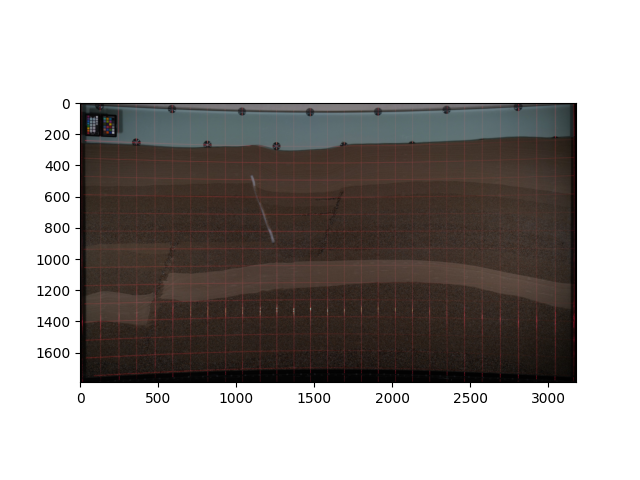

In [3]:
#Apply setup pre-bulge correction
curv_correction.pre_bulge_correction(horizontal_bulge = 5e-9)

#Show the effect on the image
curv_correction.show_current()

**Step 3: Crop image**

Step 3 is to crop the image such that the corners of the FluidFlower appears in the corner of the image. The pixel values of the four corners of the FluidFlower should be provided, starting with the upper left corner and proceeding counter-clockwise. The pixel values can be read by mousing over desired points in the image above if it is made interactive. The points are indexed using a [col,row] rule with col increasing towards the right, and row increasing downwards.

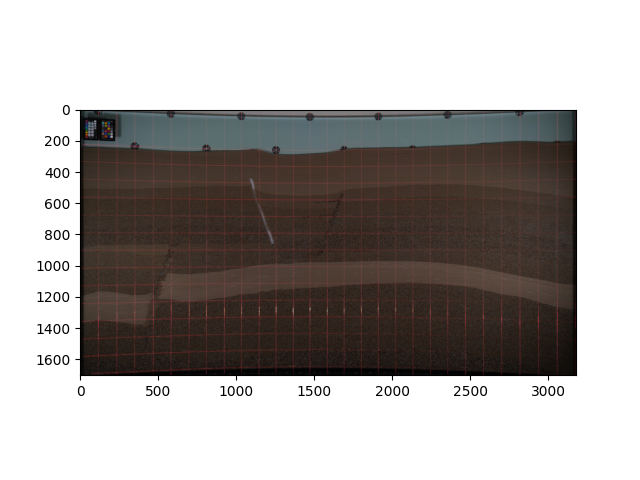

In [4]:
curv_correction.crop([
        [11, 8],
        [16, 1755],
        [3165, 1748],
        [3165, 5],
    ])

#In order to make interactive windows below, the ipympl options must be toggled
%matplotlib ipympl
curv_correction.show_current()

**Step 4: Bulge correction**

Step 4 is the actual bulge correction. Here, the number of pixels that the image curves inwards on each of the side should be provided (can be read from the plot above if the window is interactive).

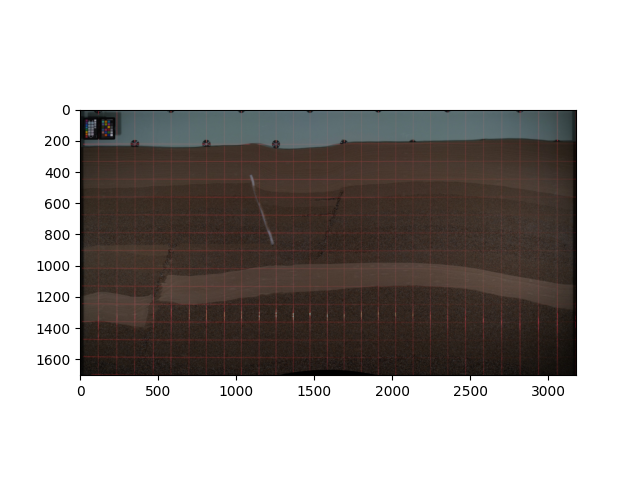

In [5]:
curv_correction.bulge_corection(left = 0, right = 0, top = 53, bottom = 57)

#In order to make interactive windows below, the ipympl options must be toggled
%matplotlib ipympl

curv_correction.show_current()

**Step 5: Stretch**

The final modification is to correct for potential stretch in the image. To do this we need one point that has been stretched (point_source), the point that it has been stretched from (point_destination), and the stretch center (stretch_center). The parameters can for example be found by drawing a grid on the gridded image (using daria functionality) and finding the points on the laser grid and the drawn grid. The stretch center will be where the grids align, a point_source is a laser grid line, and a point_destination is the corresponding point on the drawn grid.


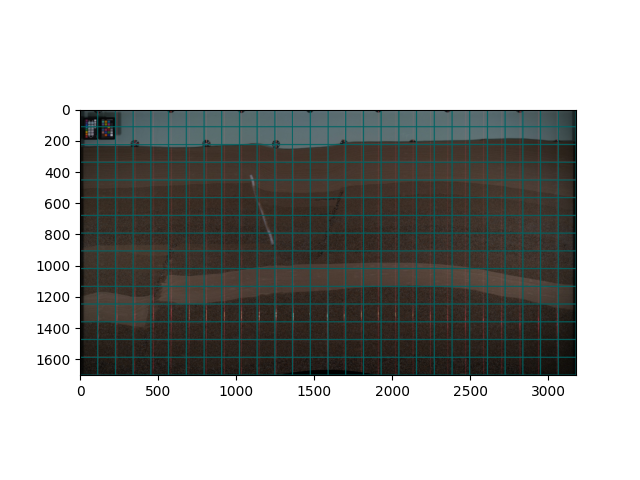

In [6]:
gridded_image = da.Image(curv_correction.current_image, width = curv_correction.width, height = curv_correction.height, color_space = "BGR")
double_gridded_image = gridded_image.add_grid(dx = 0.1, dy = 0.1, color=(100,100, 0), thickness= 5)

#In order to make interactive windows below, the ipympl options must be toggled
%matplotlib ipympl
double_gridded_image.plt_show()


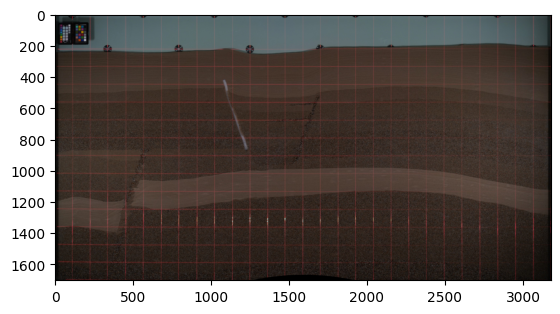

In [7]:
curv_correction.stretch_correction(point_source=[585,676], point_destination= [567, 676], stretch_center= [1476, 1020])

#Turn off interactive windows
%matplotlib inline
curv_correction.show_current()

**Applying the curvature correction to a new image with the same setup**

Once the curvature correction has been set up properly as above, a config dictionary has automatically been created (can be reached with curv_correction.config). Applying the same settings to a new image can now be done just by initializing a DarIA image with the curvature correction object.

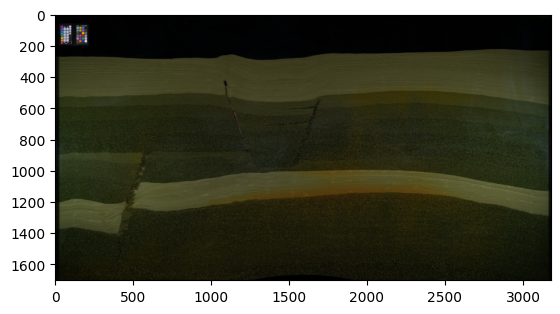

In [8]:
corrected_image = da.Image("../images/co2_0.jpg", curvature_correction=curv_correction, width = 2.8, height = 1.5)
corrected_image.plt_show()

**Saving the config to an external json-file**

The config file can also be saved as a json file for later use, by applying the method below and providing a desired path to where the file should be stored.

In [9]:
curv_correction.write_config_to_file("../images/config.json")

**Creating curvature correction from json-config file**

One could also directly initialize the curvature correction from a config file by using the method below.

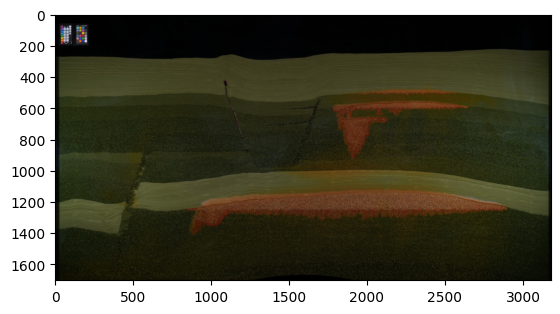

In [10]:
new_curv_correction = da.CurvatureCorrection(config_source = "../images/config.json")

# The newly created curvature correction can then be applied to a new image and will work without any further setup
new_corrected_image = da.Image("../images/co2_1.jpg", curvature_correction = new_curv_correction, width = 2.8, height = 1.5)
new_corrected_image.plt_show()